# Data Science Brasil - Desafio Kaggle - Titanic

#### Equipe:
    * Ricardo Galiardi 
    * Wanderson Henrique dos Santos

##### Preparação dos Dados

In [ ]:
# Importando os módulos

import numpy as np
import pandas as pd                 
import matplotlib.pyplot as plt    
import seaborn as sns; sns.set(style="ticks", color_codes=True)
%matplotlib inline       

In [8]:
# Lista os arquivos

import os
print(os.listdir())

['.ipynb_checkpoints', 'gender_submission.csv', 'Kaggle - Data Titanic.zip', 'README.md', 'test.csv', 'Titanic.ipynb', 'train.csv']


## Datasets

### Treino
    Columns
        * PassengerId: type should be integers
        * Survived: Survived or Not
        * Pclass: Class of Travel
        * Name: Name of Passenger
        * Sex: Gender
        * Age
        * SibSp: Number of Sibling/Spouse aboard
        * Parch: Number of Parent/Child aboard
        * Ticket
        * Fare
        * Cabin
        * Embarked: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown
            
### Teste
    Columns
        * PassengerId
        * Pclass
        * Name
        * Sex
        * Age
        * SibSp
        * Parch
        * Ticket
        * Fare
        * Cabin
        * Embarked
        
### Envio
    Columns
        * PassengerId: integer
        * Survived: binary

## Variable Notes
    * survival
        * 0 = No
        * 1 = Yes
    * pclass: A proxy for socio-economic status (SES)
        * 1: 1st = Upper
        * 2: 2nd = Middle
        * 3: 3rd = Lower
    * age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
    * sibsp: The dataset defines family relations in this way...
        * Sibling = brother, sister, stepbrother, stepsister
        * Spouse = husband, wife (mistresses and fiancés were ignored)
    * parch: The dataset defines family relations in this way...
        * Parent = mother, father
        * Child = daughter, son, stepdaughter, stepson
        * Some children travelled only with a nanny, therefore parch=0 for them.
    * embarked: 
        * C = Cherbourg
        * Q = Queenstown
        * S = Southampton  

In [9]:
# Prepara os datasets

# Dados de Treino
dstrain = pd.read_csv("train.csv", names=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], sep=',', header=0)

# Dados de Teste
dstest = pd.read_csv("test.csv", names=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], sep=',', header=0)

# Dados para Envio
dssubmission = pd.read_csv("gender_submission.csv", names=['PassengerId', 'Survived'], sep=',', header=0)

In [12]:
# Imprime na tela

dstrain.head()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
# Verifica a quantidade de dados e dá uma visão de dados missing

dstrain.count()

In [19]:
# Verificando se existem valores nulos

dstrain.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# Verifique se existem valores nulos no dataset

dstrain.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Normalizar e limpar os dados missing



In [17]:
# Visualizando a correlação em tabela

# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
dstrain.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


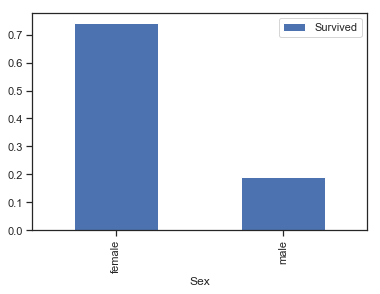

In [21]:
#verificando a coluna sexo

sex_pivot = dstrain.pivot_table(index="Sex",values="Survived") 
sex_pivot.plot.bar()
plt.show()

##### Exploração dos Dados

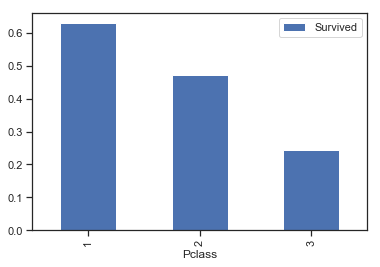

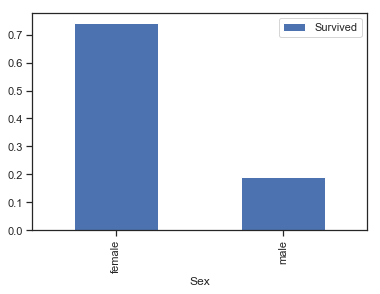

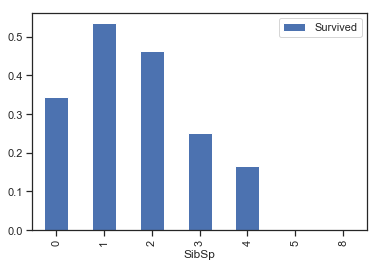

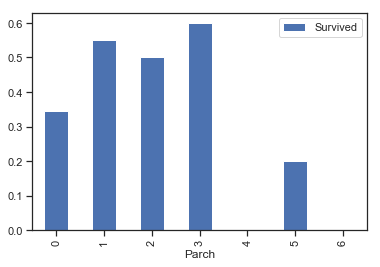

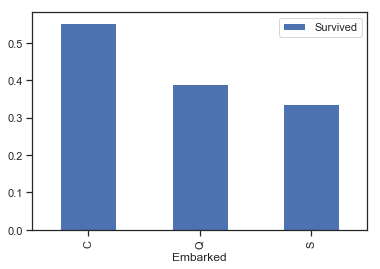

In [46]:
def fnPlotBar(dataset, column):
        plt = dataset.pivot_table(index=column,values='Survived')
        plt.plot.bar()
    
fnPlotBar(dstrain, 'Pclass')
fnPlotBar(dstrain, 'Sex')
fnPlotBar(dstrain, 'SibSp')
fnPlotBar(dstrain, 'Parch')
fnPlotBar(dstrain, 'Embarked')

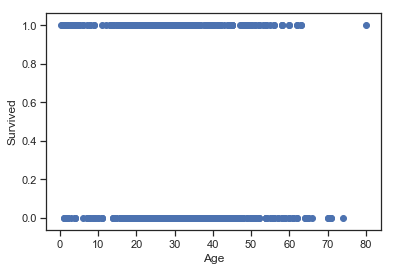

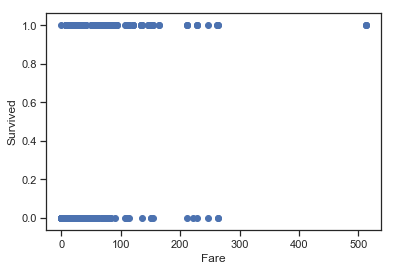

In [47]:
# Cria uma função para análise gráfica do dataset e das vendas semanais
def fnScatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Survived'])
    #plt..plot.bar(dstrain.pivot_table(index=dataset[column],values=dataset['Survived']))
    plt.ylabel('Survived')
    plt.xlabel(column)

fnScatter(dstrain, 'Age')
fnScatter(dstrain, 'Fare')

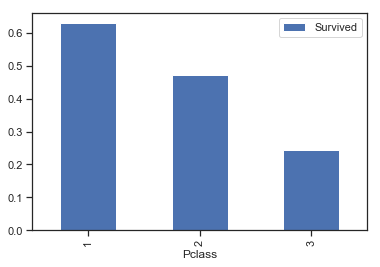

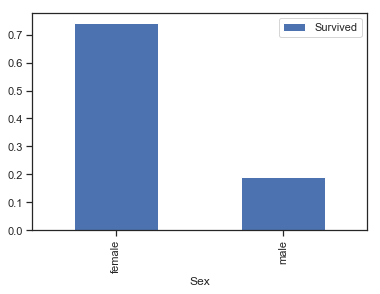

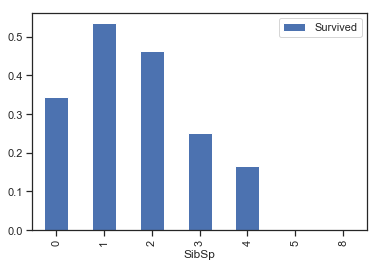

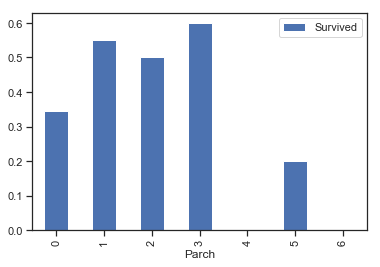

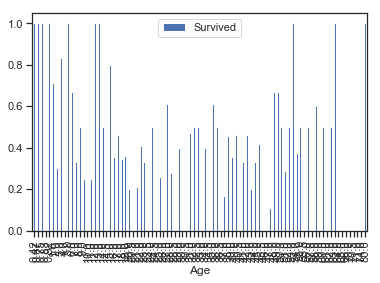

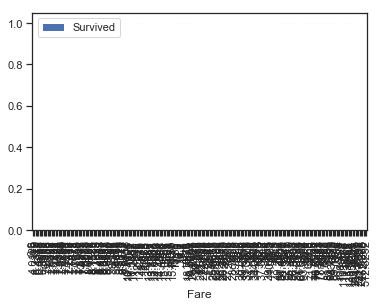

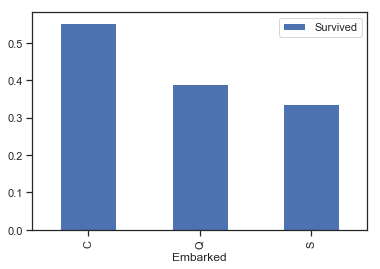

In [32]:
def plotter(dataset, column):
    #plt.figure()
    #plt.scatter(dataset[column] , dataset['Survived'])
    plt = dstrain.pivot_table(index=column,values='Survived')
    plt.plot.bar()
    #plt.ylabel('Survived')
    #plt.xlabel(column)
    
plotter(dstrain, 'Pclass')
plotter(dstrain, 'Sex')
plotter(dstrain, 'SibSp')
plotter(dstrain, 'Parch')
plotter(dstrain, 'Embarked')

plotter(dstrain, 'Age')
plotter(dstrain, 'Fare')
# class_pivot = train.pivot_table(index="Pclass",values="Survived")
# class_pivot.plot.bar(color='r') # r para indicar a cor vermelha(red)
# plt.show()

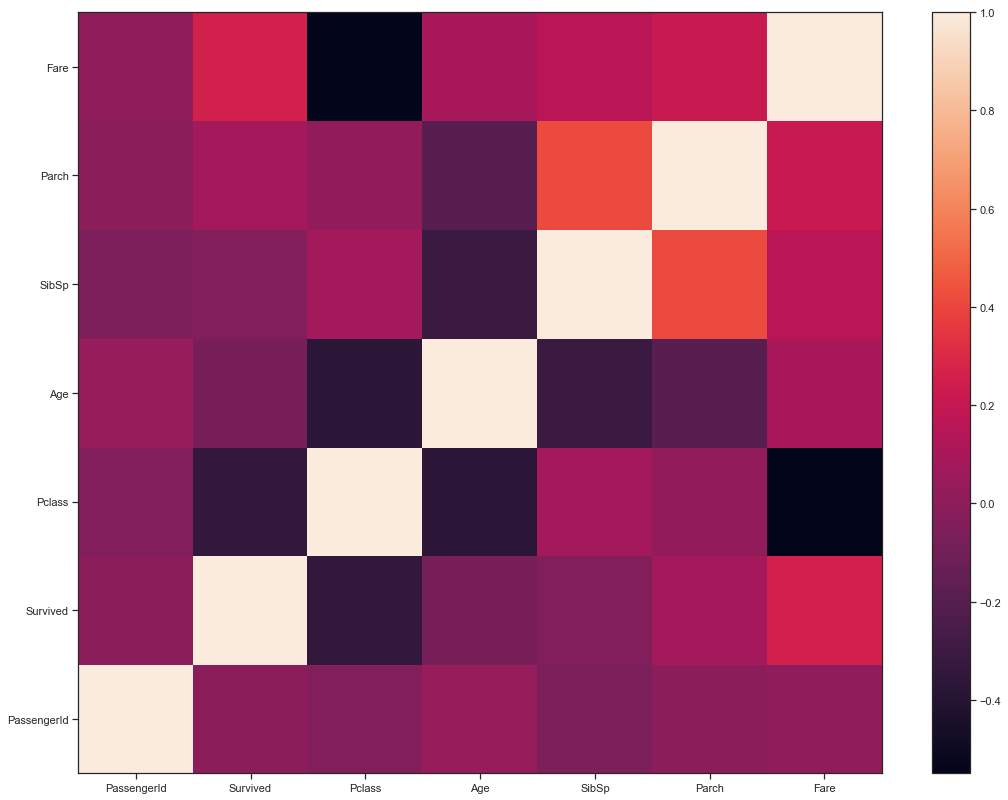

In [6]:
# Correlação Entre as Variáveis
fig = plt.figure(figsize=(18, 14))
corr = dstrain.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

ValueError: color kwarg must have one color per dataset

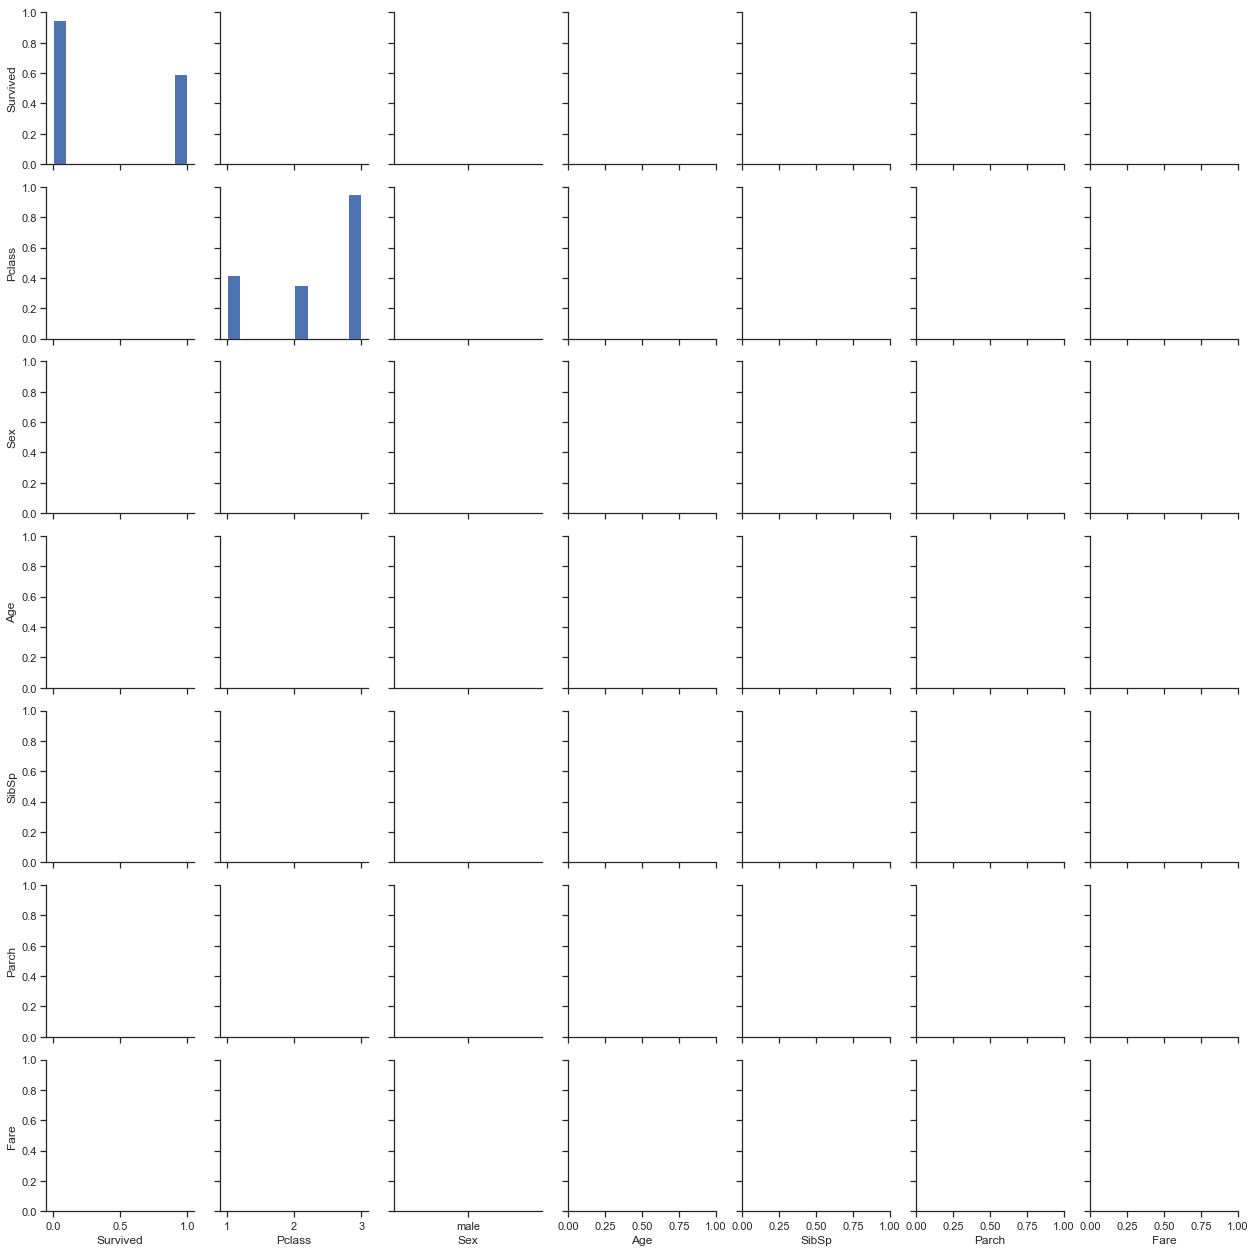

In [13]:
# Analisando as Distribuições das Variáveis

sns.pairplot(dstrain, vars=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])

for name, group in dstrain.groupby(["Cabin", "Embarked"]):
    plt.title(name)
    plt.scatter(range(len(group)), group["Survived"])
    plt.show()
    break

In [ ]:


survival